# Investigating Fandango Movie Ratings

In this project I explore Fandango movie ratings looking for bias.  We will compare Fandango ratings form 2016-2017 to the previous analysis by Walt Hickey

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

old_scores = pd.read_csv("fandango_score_comparison.csv")
new_scores = pd.read_csv("movie_ratings_16_17.csv")

In [2]:
old_scores.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
new_scores.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [4]:
old_scores = old_scores[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
new_scores = new_scores[['movie', 'year', 'fandango']].copy()

In [5]:
old_scores.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [6]:
new_scores.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Population of interest is all Fandango film reviews.

Old sample comes from all films reviewed by the different agencies and at least 30 Fandango fan reviews.

New sample contains data from 214 of the most popular movies released in 2016-2017

In neither case was the sampling random.

### Redefine goal

Our samples are not likely to be representative of population we are interested in studying, therefore we should change the goal of our study.  Our new goal is to determine whether there is any change in rating of popular movies on Fandango before and after the previous analysis

In [9]:
import random
random.seed(1)
sample = new_scores.sample(10)
sample

,movie,year,fandango
85,John Wick: Chapter 2,2017,4.5
112,Misconduct,2016,3.0
24,Blair Witch,2016,3.0
145,Skiptrace,2016,3.5
189,The Nice Guys,2016,3.5
204,War Dogs,2016,4.0
183,The Last Word,2017,3.5
195,The Shallows,2016,4.0
166,The Bye Bye Man,2017,3.0
58,Free State of Jones,2016,4.0


2/10 (Misconduct, Skiptrace, ) movies from the random sample obtained from the new reviews did not have at least 30 fan votes.

In [13]:
old_scores["2015"] = old_scores["FILM"].apply(lambda x: "2015" in x)
old_scores = old_scores[old_scores['2015']]
old_scores.head(10)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,2015
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,True
1,Cinderella (2015),5.0,4.5,12640,0.5,True
2,Ant-Man (2015),5.0,4.5,12055,0.5,True
3,Do You Believe? (2015),5.0,4.5,1793,0.5,True
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,True
5,The Water Diviner (2015),4.5,4.0,397,0.5,True
6,Irrational Man (2015),4.0,3.5,252,0.5,True
8,Shaun the Sheep Movie (2015),4.5,4.0,896,0.5,True
9,Love & Mercy (2015),4.5,4.0,864,0.5,True
10,Far From The Madding Crowd (2015),4.5,4.0,804,0.5,True


In [15]:
new_scores = new_scores[new_scores.year == 2016]
new_scores.head(10)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0
6,A Street Cat Named Bob,2016,4.5
7,Alice Through the Looking Glass,2016,4.0
8,Allied,2016,4.0
9,Amateur Night,2016,3.5
10,Anthropoid,2016,4.0


In [16]:
%matplotlib inline

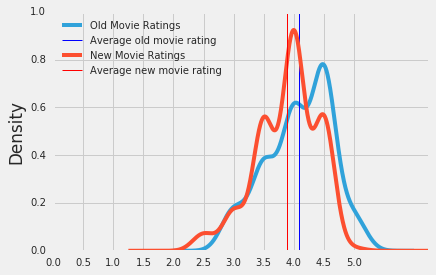

In [39]:
plt.style.use('fivethirtyeight')

old_scores['Fandango_Stars'].plot.kde(xticks = np.linspace(0,5,11), label="Old Movie Ratings")
plt.axvline(old_scores['Fandango_Stars'].mean(), color="blue",linewidth=1, label = "Average old movie rating")
new_scores['fandango'].plot.kde(xticks = np.linspace(0,5,11), label = "New Movie Ratings")
plt.axvline(new_scores['fandango'].mean(), color = 'red', linewidth=1, label = "Average new movie rating")
plt.legend(loc = 'upper left')

It appears that movies in 2016 were rated lower on average compared with 2015 displayed ratings (the "Fandango Stars")

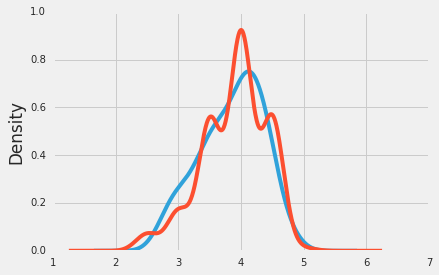

In [40]:
old_scores['Fandango_Ratingvalue'].plot.kde()
new_scores['fandango'].plot.kde()

The new scores match the distribution of the actual old ratings (not the displayed "Stars")

Analyzing frequency distributions

In [52]:
old_scores['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [53]:
new_scores['fandango'].value_counts(normalize=True, sort = False).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In [67]:
old_mean = old_scores['Fandango_Stars'].mean()
old_median = old_scores['Fandango_Stars'].median()
old_mode = old_scores['Fandango_Stars'].mode()[0]

new_mean = new_scores['fandango'].mean()
new_median = new_scores['fandango'].median()
new_mode = new_scores['fandango'].mode()[0]

In [68]:
print("2015\n------\nMean: {}\nMedian: {}\nMode: {}\n\n".format(old_mean, old_median, old_mode))

print("2016\n------\nMean: {}\nMedian: {}\nMode: {}".format(new_mean, new_median, new_mode))


2015
------
Mean: 4.0852713178294575
Median: 4.0
Mode: 4.5


2016
------
Mean: 3.887434554973822
Median: 4.0
Mode: 4.0


In [69]:
summ = pd.DataFrame()
summ['2015'] = [old_mean, old_median, old_mode]
summ['2016'] = [new_mean, new_median, new_mode]
summ.index = ['Mean', 'Median', 'Mode']
summ

,2015,2016
Mean,4.085271,3.887435
Median,4.000000,4.000000
Mode,4.500000,4.000000


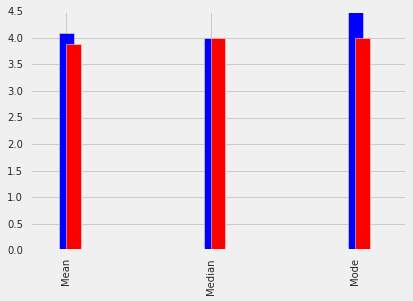

In [77]:
plt.style.use('fivethirtyeight')
summ['2015'].plot.bar(color = 'b', align = 'center', width=0.1)
summ['2016'].plot.bar(color = 'r', align = 'edge', width=0.1)